# **Republique du Senegal-Ecole nationale de la statistique et de l'analyse economique  PIERRE NDIAYE de Dakar**


---


ISE 1 -2023/2024-\
Groupe 7 TP optimisation sous la direction de Dr Diop\
Moussa \
Sadibou\
Hanna\
\
\
***Sujet***:Application de l'optimisation a la reconaissance binaire d'image : cas des modeles SVM


---



# 1- Importer les packages  et initialisation de la base de donnee

In [1]:

import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Charger la base de données Iris
data = load_iris()
X = data.data  # Les caractéristiques des fleurs
y = data.target  # Les labels des fleurs (0, 1, ou 2)
# Filtrer pour ne garder que deux classes pour la classification binaire
X = X[y != 2]  # Garder uniquement les exemples où le label n'est pas 2
y = y[y != 2]  # Garder uniquement les labels qui ne sont pas 2
y[y == 0] = -1  # Convertir les labels de 0 à -1 pour la classification binaire
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

# 2 Apercu de la base de donnee iris

In [2]:
# Créer un DataFrame pour un aperçu plus lisible
df_filtered = pd.DataFrame(X, columns=data.feature_names)
df_filtered['species'] = y
df_filtered['species'] = df_filtered['species'].map({-1: 'setosa', 1: 'versicolor'})

# Afficher les premières lignes du DataFrame
df_filtered.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3- Representation graphique

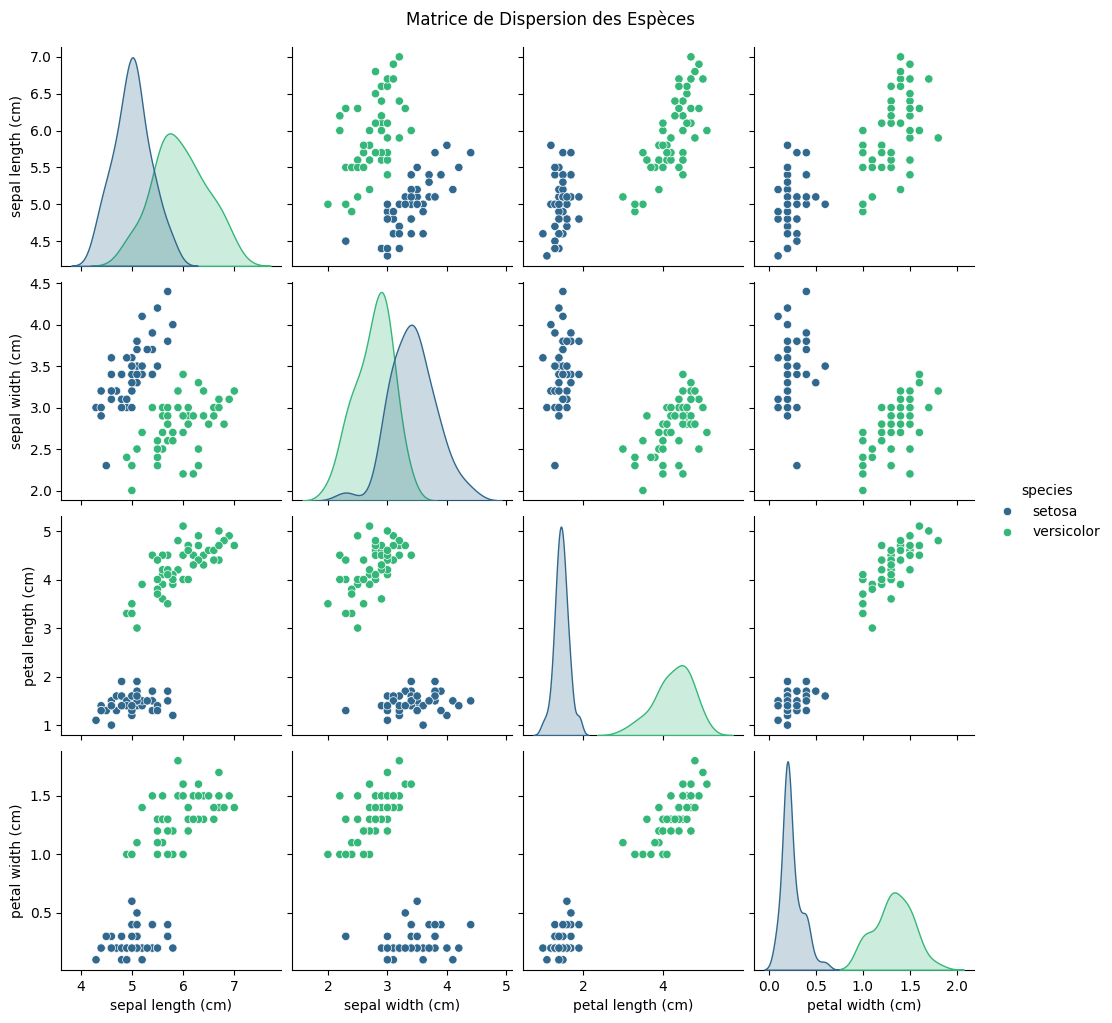

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer une matrice de dispersion avec des styles améliorés
sns.pairplot(df_filtered, hue='species', palette='viridis')
plt.suptitle('Matrice de Dispersion des Espèces', y=1.02)
plt.show()


Chaque graphique montre une paire de caractéristiques des fleurs. Les points dans chaque graphique représentent les échantillons de fleurs, colorés en fonction de leur espèce (setosa ou versicolor).
Axes : Les axes de chaque sous-graphique représentent les deux caractéristiques que vous comparez dans ce graphique particulier.

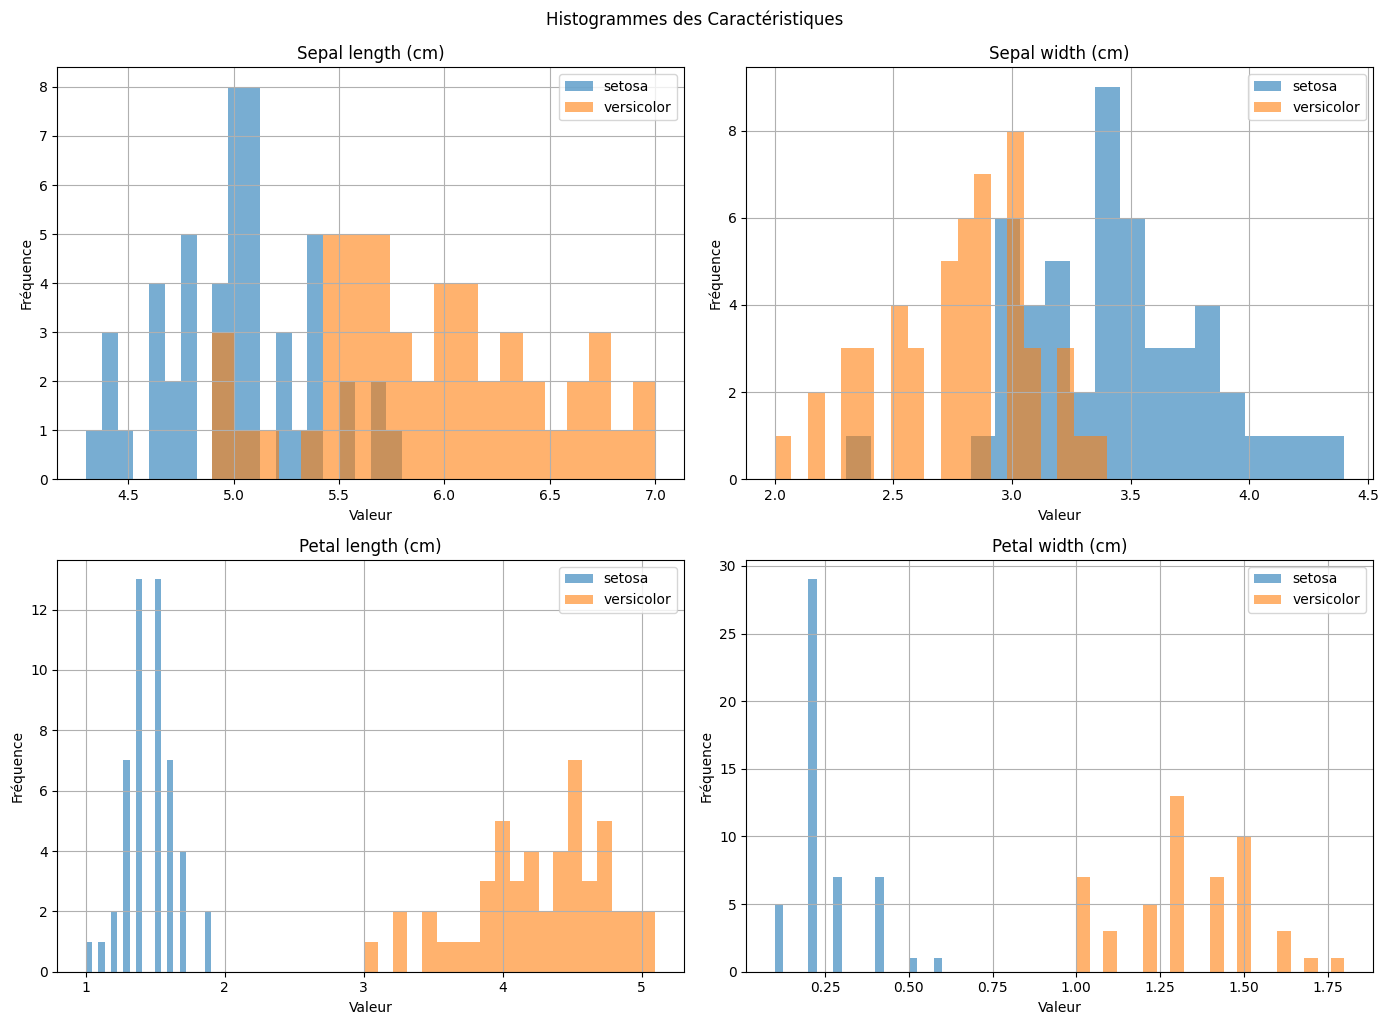

In [4]:
plt.figure(figsize=(14, 10))
colors = {'setosa': '#1f77b4', 'versicolor': '#ff7f0e'}

for i, feature in enumerate(data.feature_names):
    plt.subplot(2, 2, i + 1)
    for label, color in colors.items():
        plt.hist(X[y == (1 if label == 'versicolor' else -1), i], alpha=0.6, label=label, color=color, bins=20)
    plt.title(feature.capitalize())
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')
    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Histogrammes des Caractéristiques', y=1.02)
plt.show()


Les histogrammes des caractéristiques montrent la distribution de chaque caractéristique (longueur et largeur des sépales et des pétales) pour les deux espèces restantes (setosa et versicolor). Chaque sous-graphique représente une caractéristique différente. Les histogrammes comparent la fréquence des valeurs de chaque caractéristique pour les deux espèces, vous permettant de voir comment les distributions des caractéristiques se chevauchent ou se distinguent entre les espèces.

<ipython-input-5-e48d25371c39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df_filtered, palette='Set2')
<ipython-input-5-e48d25371c39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df_filtered, palette='Set2')
<ipython-input-5-e48d25371c39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df_filtered, palette='Set2')
<ipython-input-5-e48d25371c39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

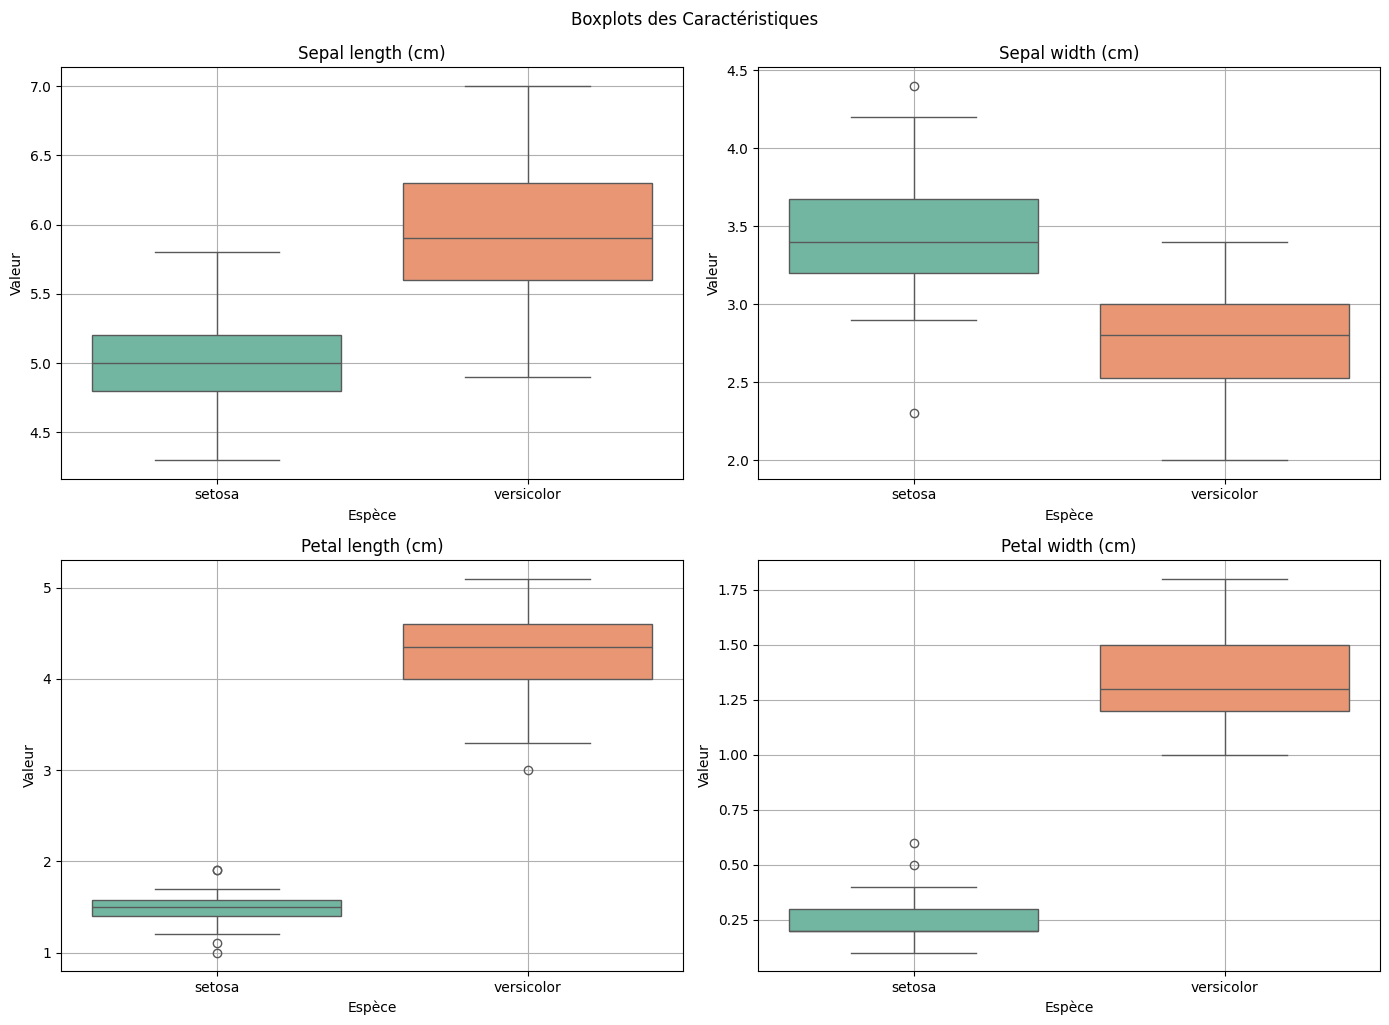

In [5]:
plt.figure(figsize=(14, 10))

for i, feature in enumerate(data.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df_filtered, palette='Set2')
    plt.title(feature.capitalize())
    plt.xlabel('Espèce')
    plt.ylabel('Valeur')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Boxplots des Caractéristiques', y=1.02)
plt.show()


Les boxplots des caractéristiques affichent la répartition des valeurs de chaque caractéristique pour les deux espèces (setosa et versicolor). Chaque boxplot montre la médiane, les quartiles, et les valeurs aberrantes (outliers) pour chaque caractéristique. Les boxplots aident à comparer la distribution des caractéristiques entre les espèces, en mettant en évidence les différences de médiane, d'étendue interquartile, et de dispersion des valeurs.

# 4-Implementation de l'algorithme

In [6]:
import numpy as np

class SVM:
    def __init__(self, C=1.0, tol=1e-3, max_iter=1000):
        """
        Initialisation du classifieur SVM.

        Paramètres
        ----------
        C : float, le paramètre de régularisation.
        tol : float, tolérance pour la condition d'arrêt.
        max_iter : int, le nombre maximum d'itérations.
        """
        self.C = C  # Paramètre de régularisation
        self.tol = tol  # Tolérance pour la convergence
        self.max_iter = max_iter  # Nombre maximum d'itérations
        self.w = None  # Poids du modèle (sera initialisé plus tard)
        self.b = 0  # Biais initialisé à zéro

    def fit(self, X, y):
        """
        Entraîner le classifieur SVM en utilisant l'algorithme SMO.

        Paramètres
        ----------
        X : ndarray, les données d'entraînement.
        y : ndarray, les labels associés aux données.
        """
        n_samples, n_features = X.shape  # Nombre d'exemples et de caractéristiques
        self.w = np.zeros(n_features)  # Initialiser les poids à zéro
        alphas = np.zeros(n_samples)  # Initialiser les multiplicateurs de Lagrange à zéro
        iters = 0  # Compteur d'itérations

        while iters < self.max_iter:
            alpha_prev = np.copy(alphas)  # Copier les anciens alphas pour vérifier la convergence
            for j in range(n_samples):
                i = self._random_index(j, n_samples)  # Sélectionner un indice i différent de j de manière aléatoire
                x_i, x_j, y_i, y_j = X[i], X[j], y[i], y[j]  # Extraire les données et labels des indices i et j
                k_ij = np.dot(x_i, x_j)  # Calculer le produit scalaire entre x_i et x_j
                eta = 2 * k_ij - np.dot(x_i, x_i) - np.dot(x_j, x_j)  # Calculer eta

                if eta >= 0:
                    continue  # Si eta est non négatif, passer à la prochaine itération

                e_i = self._error(x_i, y_i, alphas, X, y, self.b)  # Calculer l'erreur pour x_i
                e_j = self._error(x_j, y_j, alphas, X, y, self.b)  # Calculer l'erreur pour x_j

                alpha_j_old, alpha_i_old = alphas[j], alphas[i]  # Sauvegarder les anciens alphas

                L, H = self._find_bounds(y_i, y_j, alpha_i_old, alpha_j_old)  # Trouver les bornes L et H

                alphas[j] = alpha_j_old - (y_j * (e_i - e_j)) / eta  # Mettre à jour alpha_j
                alphas[j] = np.clip(alphas[j], L, H)  # S'assurer qu'alpha_j est dans les bornes

                alphas[i] = alpha_i_old + y_i * y_j * (alpha_j_old - alphas[j])  # Mettre à jour alpha_i

                # Calculer les nouveaux biais b1 et b2
                b1 = self.b - e_i - y_i * (alphas[i] - alpha_i_old) * np.dot(x_i, x_i) - y_j * (alphas[j] - alpha_j_old) * np.dot(x_i, x_j)
                b2 = self.b - e_j - y_i * (alphas[i] - alpha_i_old) * np.dot(x_i, x_j) - y_j * (alphas[j] - alpha_j_old) * np.dot(x_j, x_j)

                if 0 < alphas[i] < self.C:
                    self.b = b1
                elif 0 < alphas[j] < self.C:
                    self.b = b2
                else:
                    self.b = (b1 + b2) / 2  # Prendre la moyenne de b1 et b2 si aucune des conditions précédentes n'est satisfaite

            diff = np.linalg.norm(alphas - alpha_prev)  # Calculer la différence entre les anciens et nouveaux alphas
            if diff < self.tol:  # Vérifier la condition d'arrêt
                break
            iters += 1  # Incrémenter le compteur d'itérations

        self.w = np.dot((alphas * y), X)  # Calculer les poids du modèle
        self.sv_idx = np.where(alphas > 0)[0]  # Trouver les indices des vecteurs de support

    def predict(self, X):
        """
        Prédire les labels pour les données données.

        Paramètres
        ----------
        X : ndarray, les données pour lesquelles prédire les labels.

        Retour
        ------
        ndarray, les labels prédits.
        """
        return np.sign(np.dot(X, self.w) + self.b)  # Prédire en utilisant la fonction de décision
        # la fonction np.sign(matrice) renvoi une matrice avec des 1 pour les coefs positifs ,-1 pour les donnee negatives

    def _error(self, x_k, y_k, alphas, X, y, b):
        """
        Calculer l'erreur pour un exemple donné.

        Paramètres
        ----------
        x_k : ndarray, un exemple.
        y_k : int, le label de l'exemple.
        alphas : ndarray, les multiplicateurs de Lagrange.
        X : ndarray, les données d'entraînement.
        y : ndarray, les labels associés aux données.
        b : float, le biais.

        Retour
        ------
        float, l'erreur pour l'exemple donné.
        """
        return np.dot((alphas * y).T, np.dot(X, x_k)) + b - y_k  # Calculer l'erreur de prédiction

    def _find_bounds(self, y_i, y_j, alpha_i, alpha_j):
        """
        Trouver les bornes L et H pour la mise à jour des alphas.

        Paramètres
        ----------
        y_i : int, le label de l'exemple i.
        y_j : int, le label de l'exemple j.
        alpha_i : float, le multiplicateur de Lagrange pour l'exemple i.
        alpha_j : float, le multiplicateur de Lagrange pour l'exemple j.

        Retour
        ------
        tuple, les bornes L et H.
        """
        if y_i != y_j:
            return max(0, alpha_j - alpha_i), min(self.C, self.C - alpha_i + alpha_j)
        else:
            return max(0, alpha_i + alpha_j - self.C), min(self.C, alpha_i + alpha_j)

    def _random_index(self, z, n_samples):
        """
        Générer un indice aléatoire différent de l'indice donné.

        Paramètres
        ----------
        z : int, l'indice donné.
        n_samples : int, le nombre total d'exemples
.
        Retour
        ------
        int, un indice aléatoire différent de z
.        """
        i = z
        while i == z:
            i = np.random.randint(0, n_samples - 1)
        return i


# 5- Explications et comprements

## Objectif

L'objectif de l'algorithme SVM  est de trouver un hyperplan qui sépare les données de deux classes avec la plus grande marge possible. Ce faisant, on minimise les erreurs de classification tout en maximisant la distance entre les exemples de données des deux classes et l'hyperplan.
But de l'Algorithme SMO

L'algorithme SMO  est une méthode pour entraîner un SVM en résolvant le problème d'optimisation quadratique de manière efficace. Le but est de trouver les multiplicateurs de Lagrange **alpha** qui maximisent la fonction objectif tout en respectant les contraintes du problème.
Explication des Variables dans le Code
Variables Importantes

    * X : Matrice des caractéristiques des données d'entraînement. Chaque ligne représente un exemple de données, et chaque colonne représente une caractéristique.
    * y : Vecteur des labels associés aux données d'entraînement. Chaque élément est le label d'un exemple de données, soit -1 ou 1.
    * C : Paramètre de régularisation qui contrôle le compromis entre maximiser la marge et minimiser l'erreur de classification. Plus C est grand, plus l'algorithme pénalise les erreurs de classification.
    * alpha : Vecteur des multiplicateurs de Lagrange. Ces multiplicateurs sont utilisés pour déterminer les vecteurs de support et calculer les poids du modèle.
    * w : Vecteur des poids du modèle. Les poids déterminent l'orientation et l'emplacement de l'hyperplan séparateur.
    * b : Biais du modèle. Le biais déplace l'hyperplan dans l'espace des caractéristiques pour mieux séparer les données.

Fonctionnement de l'Algorithme SMO

   * Initialisation des Multiplicateurs de Lagrange :
        On initialise alpha à zéro pour tous les exemples de données.

    * Sélection des Paires de Multiplicateurs :
        Deux multiplicateurs de Lagrange (alpha_i et alpha_j​) sont sélectionnés à chaque itération.
        La sélection est faite de manière à maximiser l'amélioration de la fonction objectif.

    * Calcul de l'Erreur :
        Les erreurs associées aux exemples xi et xj sont calculées en utilisant la fonction _error.
        Ces erreurs sont utilisées pour mettre à jour les multiplicateurs.

    * Calcul de eta :
        eta est une valeur qui mesure la courbure de la fonction objectif par rapport aux multiplicateurs.
        Si eta >=0, l'itération est ignorée car la mise à jour ne sera pas bénéfique.

    * Mise à jour des Multiplicateurs :
        Les multiplicateurs αi​ et αj​ sont mis à jour en résolvant un sous-problème d'optimisation quadratique simple.
        On applique les bornes L et H pour s'assurer que les nouveaux multiplicateurs respectent les contraintes du problème.

    * Mise à jour du Biais :
        Le biais b est recalculé en utilisant les nouvelles valeurs des multiplicateurs.
        Deux valeurs potentielles pour le biais b1 et b2 sont calculées, puis la valeur finale de b est déterminée en fonction des nouvelles valeurs des multiplicateurs.

    Vérification de la Convergence :
        La boucle continue jusqu'à ce que la différence entre les anciens et les nouveaux multiplicateurs soit inférieure à une tolérance définie

    Finalisation des Poids :
        Une fois que les multiplicateurs ont convergé, les poids du modèle w sont calculés en utilisant les multiplicateurs α et les données d'entraînement X.

Utilisation des Multiplicateurs de Lagrange

Les multiplicateurs de Lagrange α déterminent quels exemples de données sont les vecteurs de support. Les vecteurs de support sont les exemples de données qui se trouvent sur la marge .
Exemple d'Utilisation des Variables



In [7]:
6

6

# 5- mise en pratique

In [8]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entraîner la SVM
svm = SVM(C=1.0, tol=1e-3, max_iter=1000)
svm.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = svm.predict(X_test)

In [9]:
# Créer un dictionnaire pour mapper les valeurs numériques aux noms de classe
class_names = {-1: 'setosa', 1: 'versicolor'}

# Convertir les valeurs numériques en noms de classe dans y_train, y_test et y_pred
y_train_names = pd.Series(y_train).map(class_names)
y_test_names = pd.Series(y_test).map(class_names)
y_pred_names = pd.Series(y_pred).map(class_names)



# 6- Visualisation des donnee d'entrainement et de teste

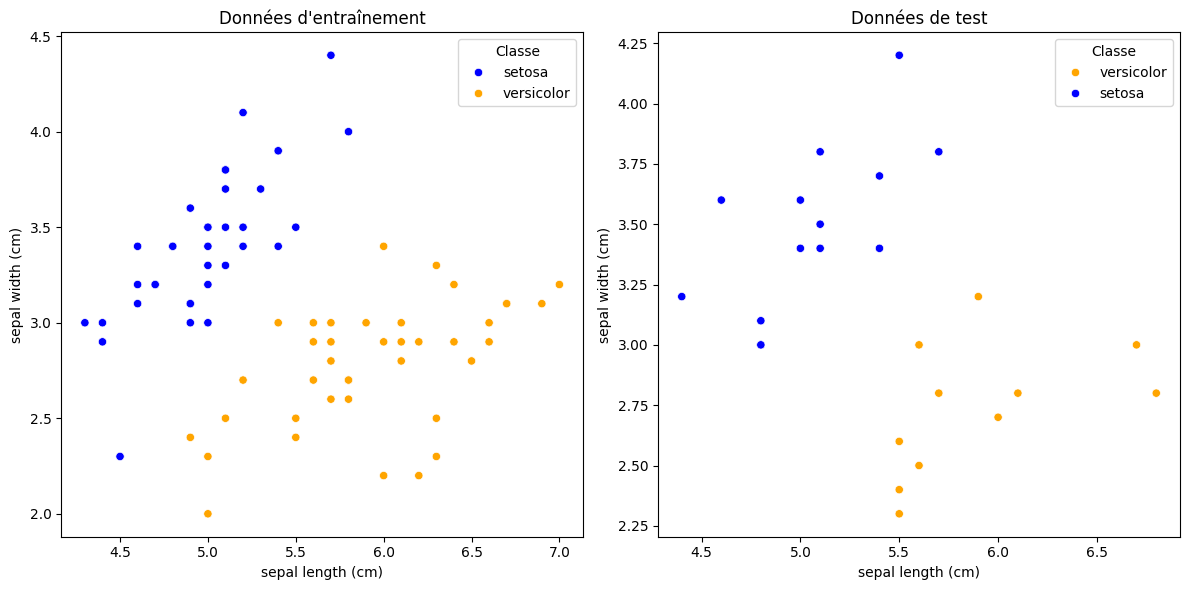

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir les données en DataFrame pour faciliter la visualisation
df_train = pd.DataFrame(X_train, columns=data.feature_names)
df_train['class'] = y_train_names
df_test = pd.DataFrame(X_test, columns=data.feature_names)
df_test['class'] = y_test_names

# Définir la palette de couleurs
palette = {'setosa': 'blue', 'versicolor': 'orange'}

# Visualiser les données d'entraînement
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_train.iloc[:, 0], y=df_train.iloc[:, 1], hue=df_train['class'], palette=palette)
plt.title("Données d'entraînement")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Classe')

# Visualiser les données de test
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_test.iloc[:, 0], y=df_test.iloc[:, 1], hue=df_test['class'], palette=palette)
plt.title("Données de test")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Classe')

plt.tight_layout()
plt.show()


In [11]:
# Resultats de travail

results_df = pd.DataFrame({
    'y_test_names': y_test_names,
    'y_pred_names': y_pred_names
})
results_df

,y_test_names,y_pred_names
0,versicolor,versicolor
1,versicolor,versicolor
2,versicolor,versicolor
3,setosa,setosa
4,setosa,setosa
5,setosa,setosa
6,setosa,setosa
7,versicolor,versicolor
8,setosa,setosa
9,setosa,setosa


Conclusion:Notre modele realise un score de 100%
Prochains mis a jours:
    - cas des donnee non lineairement separable avec l'astuce des noyeaux
    - representer graphiquement l'hyperplan
    -explorer le cas de la trois dimension avec representation graphique
    - utiliser une base de donnee issue de donne du continent africain
    

### Merci de votre attention